# NLP
Author Brian Tam, 10/16/2020

This notebook is used to process the text in Document-term matricies and reduce dimensions through topic model. The following was done:

5. Performed Train/Test/Val split to leave samples for testing my model
6. converted my text corpus into a Document-term matrix using TF-IDF vectorizer
7. Tested 6 different classification models.
8. Topic Modeled using Non-Negative Matrix Factorization
9. Labeling the Topic Matrix with the top 3 words in every topic for interpretation.

In [297]:
# Get pandas and postgres to work together
import psycopg2 as pg
import pandas as pd
import numpy as np
import pickle

# Import spacy to do NLP
import spacy

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

# Import sklearn to do CountVectorizing
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

# Topic Modeling
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

# Text Preprocessing
import re
import string

In [298]:
# Postgres info to connect
connection_args = {
    'host': 'localhost',  # We are connecting to our _local_ version of psql
    'dbname': 'myers_briggs',    # DB that we are connecting to
}

connection = pg.connect(**connection_args)  # What is that "**" there??

query = "SELECT * FROM cleaned_posts WHERE clean_post IS NOT NULL;"

df = pd.read_sql(query, connection)
print(df.shape)
df.head()

(8674, 9)


type  E/I  N/S  F/T  P/J  \
0  INFJ    0    1    1    0   
1  ENTP    1    1    0    1   
2  INTP    0    1    0    1   
3  INTJ    0    1    0    0   
4  ENTJ    1    1    0    0   

                                                post  \
0  "['http://www.youtube.com/watch?v=qsXHcwe3krw'...   
1  "[""I'm finding the lack of me in these posts ...   
2  "['Good one  _____   https://www.youtube.com/w...   
3  "['Dear INTP,   I enjoyed our conversation the...   
4  "[""You're fired."", ""That's another silly mi...   

                                       post_no_links  \
0  What has been the most life-changing experienc...   
1  I'm finding the lack of me in these posts very...   
2  Of course, to which I say I know; that's my bl...   
3  Dear INTP,   I enjoyed our conversation the ot...   
4  You're fired. That's another silly misconcepti...   

                                          spacy_post  \
0  life change experience life perc experience im...   
1  find lack post alarming sex boring position ex...   
2  course know blessing curse absolutely positive...   
3  dear intp enjoy conversation day esoteric gabb...   
4  fire silly misconception approach logically ke...   

                                          clean_post  
0  life change experience life perc experience im...  
1  find lack post alarming sex boring position ex...  
2  course know blessing curse absolutely positive...  
3  dear intp enjoy conversation day esoteric gabb...  
4  fire silly misconception approach logically ke...

In [ ]:
from sqlalchemy import create_engine
import pandas as pd


engine = create_engine('postgresql://<your_user_name>:localhost@localhost:5432/tennis')

aus_men = pd.read_csv('./tennis/AusOpen-men-2013.csv')

# I'm choosing to name this table "aus_men"
aus_men.to_sql('aus_men', engine, index=False)


In [261]:
# Postgres info to connect
connection = pg.connect(**{
    'host': 'localhost',  # We are connecting to our _local_ version of psql
    'dbname': 'myers_briggs'})    # DB that we are connecting to

POS_df = pd.read_sql(
                     "SELECT * FROM POS;", 
                    connection)
print(POS_df.shape)
list(POS_df.columns)

(8674, 18)


['ADJ',
 'ADP',
 'ADV',
 'AUX',
 'CCONJ',
 'DET',
 'INTJ',
 'NOUN',
 'NUM',
 'PART',
 'PRON',
 'PROPN',
 'PUNCT',
 'SCONJ',
 'SPACE',
 'SYM',
 'VERB',
 'X']

In [262]:
# Postgres info to connect
connection = pg.connect(**{
    'host': 'localhost',  # We are connecting to our _local_ version of psql
    'dbname': 'myers_briggs'})    # DB that we are connecting to

sent_df = pd.read_sql(
                     "SELECT * FROM sentiment;", 
                    connection)
print(sent_df.shape)
sent_df.head()

(8674, 4)


compound    neg    neu    pos
0    0.9789  0.084  0.778  0.138
1    0.9993  0.086  0.717  0.196
2    0.9990  0.081  0.718  0.201
3    0.9982  0.056  0.811  0.132
4    0.9727  0.124  0.731  0.146

In [263]:
more_df = sent_df.join(POS_df)

# Train-Test Split

In [264]:
df.columns

Index(['type', 'E/I', 'N/S', 'F/T', 'P/J', 'post', 'post_no_links',
       'spacy_post', 'clean_post'],
      dtype='object')

In [265]:
# Split the data into X and y data sets
X = df.clean_post
y = df[['type', 'E/I', 'N/S', 'F/T', 'P/J']]

In [266]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=34)

X_train_more, X_test_more = train_test_split(more_df, test_size=0.2, random_state=42)
X_train_more, X_val_more = train_test_split(X_train_more, test_size=0.25, random_state=34)

In [267]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(8674,)
(5204,)
(1735,)
(1735,)


# TF-IDF Vectorizer

In [269]:
more_stop_words = ['isfj','esfj','istj','isfp','estj','esfp','enfp','istp','infp','estp','intp','entp','enfj','intj','entj','infj', 'fe', 'fi', 'ni', 'ne', 'ti', 'se', 'te', 'si']

#### change min_df

In [ ]:
df = tfidf emojis links

In [270]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(min_df=0.05, max_df=0.75, max_features=5000, stop_words=more_stop_words)
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

In [271]:
len(pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names()).columns)

1195

In [227]:
pd.to_pickle(tfidf1,'pickled_transformations/tfidf.pkl')

# Topic Modeling

### Latent Semantic Analysis (LSA) and nonnegative matrix factorization(NMF)

In [287]:
# Acronynms: Latent Semantic Analysis (LSA) is just another name for 
#  Signular Value Decomposition (SVD) applied to Natural Language Processing (NLP)

TopicModel = NMF(40)
doc_topic = TopicModel.fit_transform(pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names()))

/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [288]:
pd.to_pickle(TopicModel, 'pickled_transformations/NMF.pkl')

In [289]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    """
    Takes in model and feature names and outputs 
    a list of string of the top words from each topic.
    """
    topics = []
    for ix, topic in enumerate(model.components_):
        topics.append(str(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])))
    return topics

In [290]:
topics = display_topics(TopicModel, tfidf1.get_feature_names(), 3)

In [291]:
topic_word = pd.DataFrame(TopicModel.components_.round(3),
             index =  topics,
             columns = tfidf1.get_feature_names())
topic_word.head(10)

ability   able  absolute  absolutely  abstract  \
tend, experience, person     0.146  0.260     0.012       0.130     0.036   
function, mbti, cognitive    0.011  0.003     0.005       0.020     0.069   
welcome, forum, hello        0.001  0.017     0.000       0.010     0.000   
music, song, listen          0.020  0.000     0.016       0.050     0.031   
sx, sp, enneagram            0.000  0.006     0.000       0.000     0.024   
date, relationship, guy      0.000  0.000     0.000       0.022     0.000   
post, thread, forum          0.004  0.072     0.003       0.017     0.001   
thank, hi, help              0.011  0.097     0.000       0.042     0.000   
send, message, hey           0.007  0.003     0.000       0.000     0.000   
yeah, shit, fuck             0.000  0.005     0.017       0.008     0.000   

                           accept  accord  account  accurate  achieve  ...  \
tend, experience, person    0.134   0.016    0.000     0.089    0.075  ...   
function, mbti, cognitive   0.016   0.088    0.041     0.124    0.002  ...   
welcome, forum, hello       0.000   0.000    0.008     0.003    0.000  ...   
music, song, listen         0.003   0.025    0.004     0.000    0.013  ...   
sx, sp, enneagram           0.004   0.033    0.007     0.019    0.000  ...   
date, relationship, guy     0.031   0.027    0.000     0.000    0.000  ...   
post, thread, forum         0.000   0.022    0.099     0.039    0.000  ...   
thank, hi, help             0.033   0.000    0.000     0.016    0.010  ...   
send, message, hey          0.000   0.000    0.013     0.034    0.000  ...   
yeah, shit, fuck            0.022   0.000    0.017     0.023    0.006  ...   

                              ya   yeah   year    yep    yes  yesterday  \
tend, experience, person   0.000  0.047  0.000  0.066  0.358      0.000   
function, mbti, cognitive  0.000  0.098  0.000  0.000  0.048      0.006   
welcome, forum, hello      0.000  0.000  0.003  0.000  0.028      0.000   
music, song, listen        0.022  0.000  0.000  0.024  0.016      0.000   
sx, sp, enneagram          0.000  0.031  0.040  0.022  0.015      0.000   
date, relationship, guy    0.052  0.000  0.343  0.002  0.014      0.047   
post, thread, forum        0.000  0.000  0.094  0.013  0.000      0.002   
thank, hi, help            0.034  0.117  0.100  0.035  0.368      0.051   
send, message, hey         0.006  0.000  0.008  0.009  0.062      0.013   
yeah, shit, fuck           0.100  0.911  0.000  0.096  0.021      0.000   

                           young  youtube    yup   zone  
tend, experience, person   0.140    0.000  0.002  0.049  
function, mbti, cognitive  0.000    0.000  0.027  0.000  
welcome, forum, hello      0.003    0.007  0.000  0.000  
music, song, listen        0.011    0.200  0.000  0.000  
sx, sp, enneagram          0.007    0.000  0.000  0.000  
date, relationship, guy    0.002    0.000  0.000  0.014  
post, thread, forum        0.010    0.000  0.000  0.001  
thank, hi, help            0.028    0.000  0.032  0.000  
send, message, hey         0.002    0.005  0.007  0.000  
yeah, shit, fuck           0.000    0.056  0.053  0.047  

[10 rows x 1195 columns]

The Vt matrix shows us the documents we started with, and how each document is made up of the 10 resulting topics. 

In [292]:
X_test_topic_array = TopicModel.transform(pd.DataFrame(X_test_tfidf1.toarray(), columns=tfidf1.get_feature_names()))

## Organize Topic DataFrames

In [293]:
X_train_topics = pd.DataFrame(doc_topic.round(5),
             index = X_train.index,
             columns = topics)
X_test_topics = pd.DataFrame(X_test_topic_array.round(5),
             index = X_test.index,
             columns = topics)
X_train_topics

tend, experience, person  function, mbti, cognitive  \
7278                   0.02908                    0.00902   
5736                   0.02894                    0.03192   
7512                   0.04896                    0.07373   
8277                   0.01858                    0.01064   
2186                   0.00000                    0.00772   
...                        ...                        ...   
8367                   0.00008                    0.01729   
7918                   0.01807                    0.00000   
8539                   0.00000                    0.00378   
824                    0.04495                    0.07191   
7274                   0.00000                    0.00000   

      welcome, forum, hello  music, song, listen  sx, sp, enneagram  \
7278                0.00000              0.05592            0.00000   
5736                0.00000              0.00209            0.02437   
7512                0.00000              0.02029            0.00000   
8277                0.00000              0.02012            0.00000   
2186                0.00000              0.00000            0.00000   
...                     ...                  ...                ...   
8367                0.01587              0.03375            0.00000   
7918                0.04590              0.03504            0.00000   
8539                0.07177              0.04269            0.00114   
824                 0.00000              0.00327            0.00000   
7274                0.01250              0.04812            0.00000   

      date, relationship, guy  post, thread, forum  thank, hi, help  \
7278                  0.00000              0.01264          0.00000   
5736                  0.04319              0.05426          0.01322   
7512                  0.00000              0.00073          0.00000   
8277                  0.00000              0.00668          0.00000   
2186                  0.00000              0.00000          0.00000   
...                       ...                  ...              ...   
8367                  0.00446              0.02915          0.01982   
7918                  0.03438              0.00138          0.02266   
8539                  0.02394              0.01499          0.02213   
824                   0.00302              0.01003          0.00000   
7274                  0.00473              0.01691          0.04084   

      send, message, hey  yeah, shit, fuck  lol, idk, ok  xd, kinda, hahaha  \
7278             0.00000           0.00000       0.00000            0.00000   
5736             0.00209           0.00065       0.02295            0.00202   
7512             0.00000           0.00899       0.02014            0.00000   
8277             0.00135           0.00000       0.00825            0.00000   
2186             0.00280           0.01111       0.00000            0.00000   
...                  ...               ...           ...                ...   
8367             0.00000           0.00000       0.00261            0.00000   
7918             0.00071           0.02484       0.07032            0.08194   
8539             0.02377           0.04203       0.00000            0.10340   
824              0.00000           0.02986       0.00000            0.00123   
7274             0.00000           0.00613       0.00000            0.00522   

      day, today, sleep  woman, man, female  mom, dad, sister  \
7278            0.07814             0.00000           0.02820   
5736            0.00983             0.00400           0.00641   
7512            0.00000             0.00000           0.04546   
8277            0.02147             0.00024           0.01418   
2186            0.03039             0.00000           0.00495   
...                 ...                 ...               ...   
8367            0.04232             0.00000           0.05328   
7918            0.00600             0.02364           0.00000   
8539            0.01962          

In [294]:
X_test_topics

tend, experience, person  function, mbti, cognitive  \
7047                   0.03716                    0.11289   
4210                   0.03747                    0.00667   
6662                   0.03186                    0.00000   
3834                   0.01553                    0.00000   
8607                   0.03677                    0.05951   
...                        ...                        ...   
4629                   0.02385                    0.02030   
4906                   0.04380                    0.00681   
2164                   0.02896                    0.00000   
7525                   0.00505                    0.00000   
5403                   0.00703                    0.04068   

      welcome, forum, hello  music, song, listen  sx, sp, enneagram  \
7047                0.00000              0.00000            0.00243   
4210                0.06043              0.00801            0.00548   
6662                0.00363              0.01231            0.00028   
3834                0.00000              0.01278            0.00000   
8607                0.00854              0.06944            0.00595   
...                     ...                  ...                ...   
4629                0.00939              0.04208            0.00051   
4906                0.00000              0.00502            0.01321   
2164                0.01680              0.00000            0.00000   
7525                0.01255              0.00000            0.00113   
5403                0.01485              0.00000            0.01072   

      date, relationship, guy  post, thread, forum  thank, hi, help  \
7047                  0.00258              0.02995          0.01870   
4210                  0.00000              0.03327          0.00000   
6662                  0.03033              0.01016          0.00000   
3834                  0.01224              0.01510          0.06943   
8607                  0.00000              0.04211          0.00123   
...                       ...                  ...              ...   
4629                  0.00000              0.00265          0.00000   
4906                  0.06377              0.00701          0.00219   
2164                  0.01378              0.00966          0.00241   
7525                  0.02161              0.00577          0.07887   
5403                  0.01723              0.02186          0.01416   

      send, message, hey  yeah, shit, fuck  lol, idk, ok  xd, kinda, hahaha  \
7047             0.00000           0.01508       0.00006            0.00047   
4210             0.00000           0.00000       0.05041            0.00000   
6662             0.00139           0.03326       0.00000            0.00000   
3834             0.02598           0.00703       0.00169            0.00000   
8607             0.02015           0.00149       0.00000            0.00000   
...                  ...               ...           ...                ...   
4629             0.00000           0.02637       0.00000            0.00158   
4906             0.00000           0.03853       0.02021            0.00058   
2164             0.00000           0.00000       0.00000            0.00091   
7525             0.00000           0.00000       0.00000            0.00000   
5403             0.00157           0.00888       0.00000            0.00000   

      day, today, sleep  woman, man, female  mom, dad, sister  \
7047            0.00052             0.01208           0.02574   
4210            0.00902             0.00189           0.00222   
6662            0.00000             0.01496           0.01635   
3834            0.02873             0.02065           0.00000   
8607            0.00000             0.01903           0.00263   
...                 ...                 ...               ...   
4629            0.03041             0.00000           0.02595   
4906            0.00630             0.01650           0.00000   
2164            0.03912          

## More Topic features with sentiment and parts-of-speech

In [295]:
X_train_more

compound    neg    neu    pos    ADJ    ADP    ADV    AUX  CCONJ    DET  \
7278    0.9993  0.089  0.747  0.164  118.0  190.0  154.0  106.0   80.0  187.0   
5736    0.9993  0.083  0.763  0.155  119.0  166.0  145.0  138.0   63.0  170.0   
7512    0.9996  0.066  0.748  0.186  118.0  128.0  111.0  127.0   49.0  158.0   
8277    0.9992  0.089  0.744  0.167  108.0  118.0  142.0  123.0   66.0  159.0   
2186    0.9407  0.123  0.724  0.153   41.0   50.0   43.0   40.0   14.0   52.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
8367    0.9998  0.049  0.727  0.224   78.0   87.0  101.0  109.0   45.0  122.0   
7918    0.9991  0.115  0.677  0.208   74.0   99.0   99.0   96.0   35.0  113.0   
8539    0.9997  0.084  0.678  0.238   63.0  103.0  104.0  101.0   57.0  115.0   
824     0.9532  0.107  0.776  0.118  127.0  130.0  115.0  106.0   42.0  154.0   
7274    0.9941  0.066  0.719  0.215   23.0   27.0   40.0   34.0   11.0   35.0   

      ...   NUM  PART   PRON  PROPN  PUNCT  SCONJ  SPACE  SYM   VERB    X  
7278  ...  14.0  48.0  198.0   41.0  182.0   45.0   15.0  4.0  239.0  1.0  
5736  ...  27.0  59.0  201.0   66.0  178.0   51.0   12.0  4.0  206.0  0.0  
7512  ...  10.0  68.0  175.0   72.0  204.0   62.0   13.0  4.0  193.0  2.0  
8277  ...  13.0  65.0  205.0   63.0  240.0   45.0   13.0  8.0  226.0  2.0  
2186  ...   7.0  26.0   67.0   19.0   83.0   17.0    4.0  1.0   97.0  0.0  
...   ...   ...   ...    ...    ...    ...    ...    ...  ...    ...  ...  
8367  ...  13.0  34.0  163.0   67.0  276.0   30.0   22.0  3.0  166.0  5.0  
7918  ...  10.0  37.0  134.0   56.0  175.0   25.0   60.0  2.0  148.0  1.0  
8539  ...  10.0  40.0  176.0   35.0  255.0   32.0   16.0  1.0  180.0  8.0  
824   ...   8.0  37.0  176.0   47.0  205.0   44.0   21.0  0.0  188.0  0.0  
7274  ...   1.0  11.0   53.0   15.0   72.0    9.0    3.0  0.0   56.0  0.0  

[5204 rows x 22 columns]

In [241]:
X_train_all = X_train_more.join(X_train_topics).drop('compound',axis=1)
X_test_all = X_test_more.join(X_test_topics).drop('compound',axis=1)

# Export as csv's

In [296]:
X_train_topics.to_csv('data/X_train_topics_filtered.csv')
X_test_topics.to_csv('data/X_test_topics_filtered.csv')

In [242]:
X_train_all.to_csv('data/X_train_all.csv')
X_test_all.to_csv('data/X_test_all.csv')
y_train.to_csv('data/y_train_all.csv')
y_test.to_csv('data/y_test_all.csv')

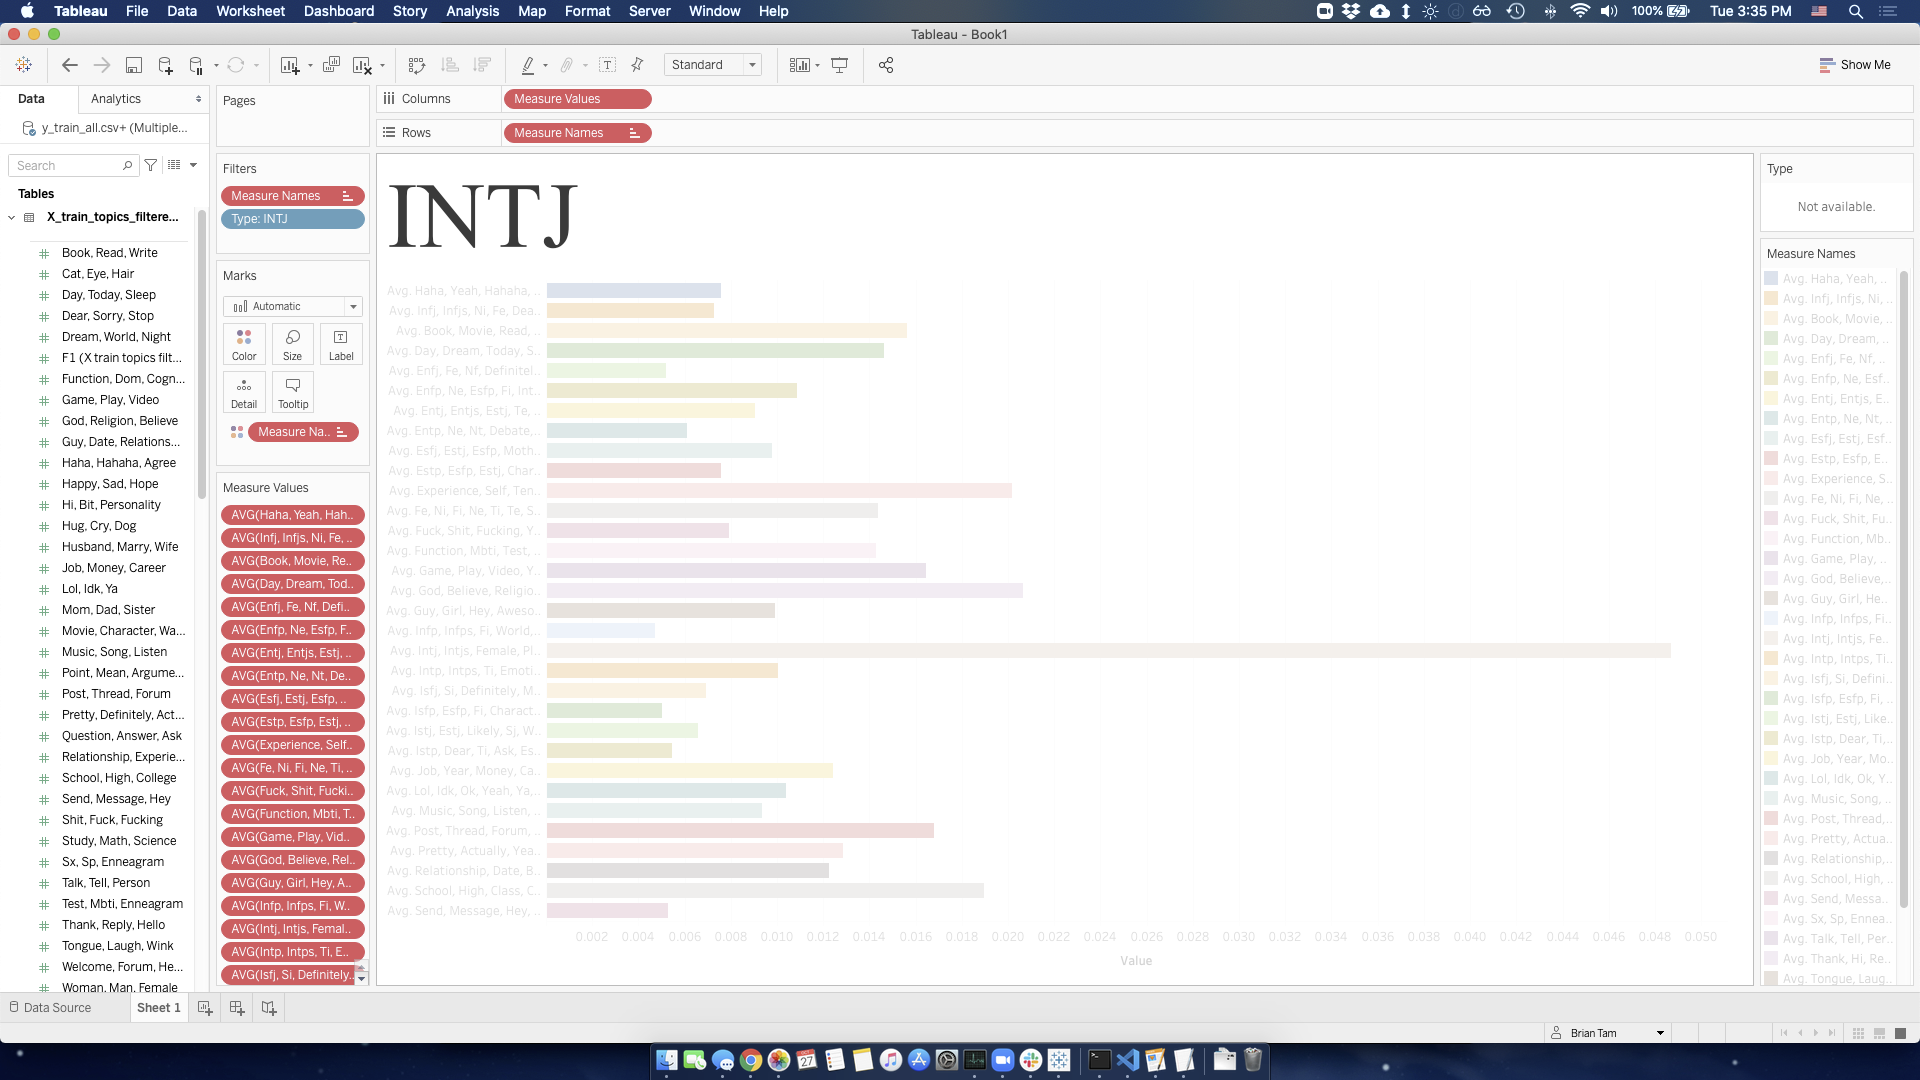

In [207]:
pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names()).to_csv('data/X_train_topics.csv')
pd.DataFrame(X_test_tfidf1.toarray(), columns=tfidf1.get_feature_names()).to_csv('data/X_text_topics.csv')

# Appendix

### WordClouds

#### Topics WordClouds

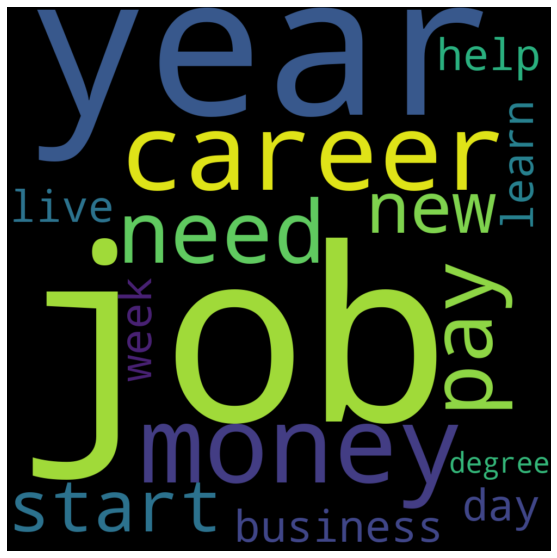

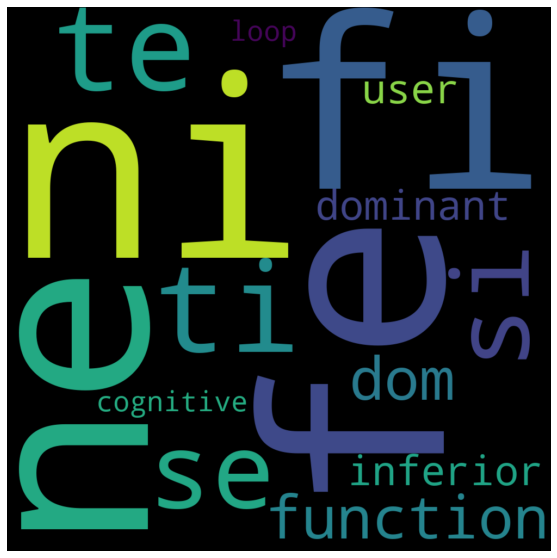

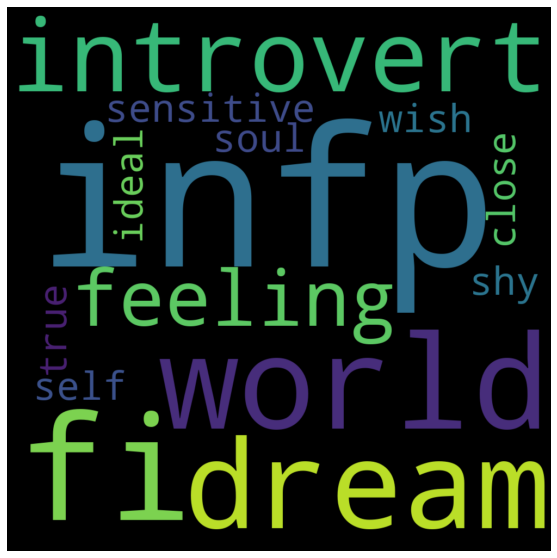

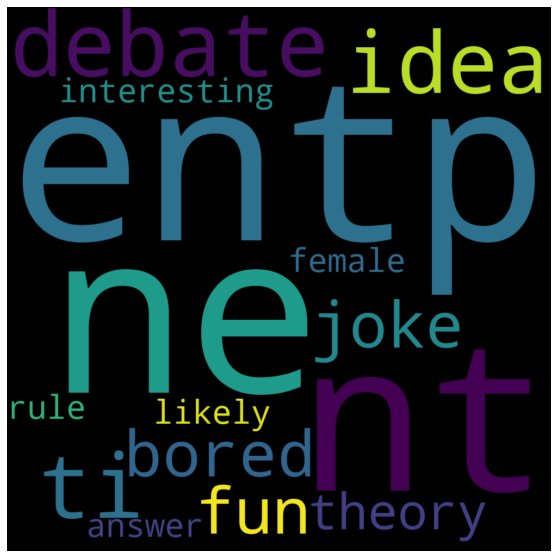

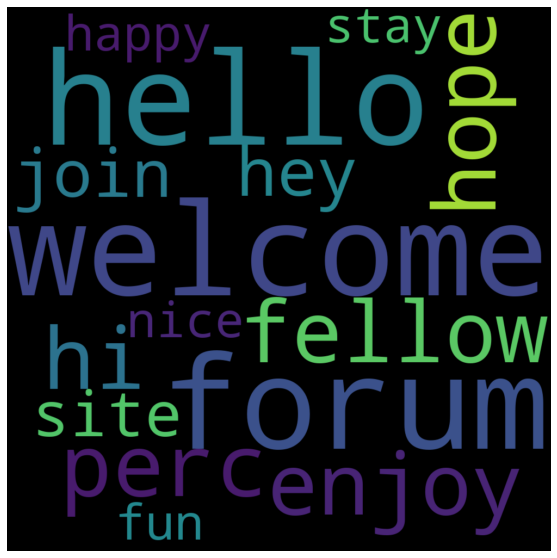

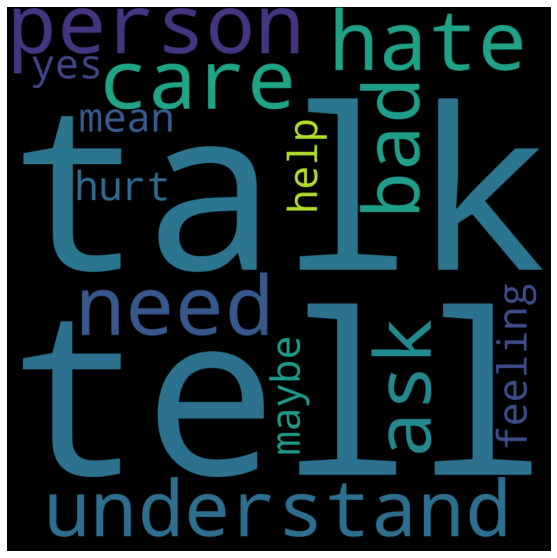

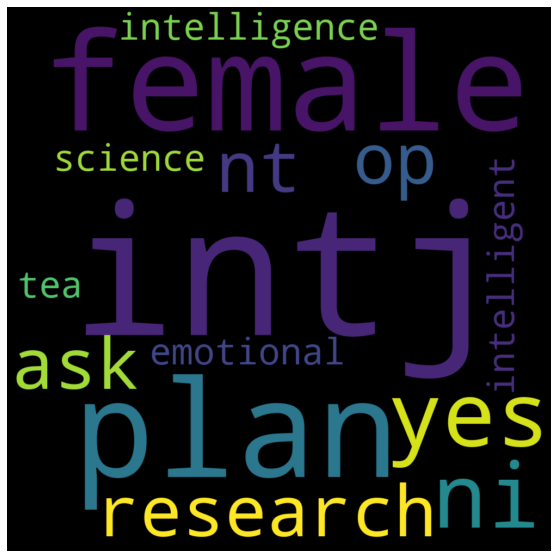

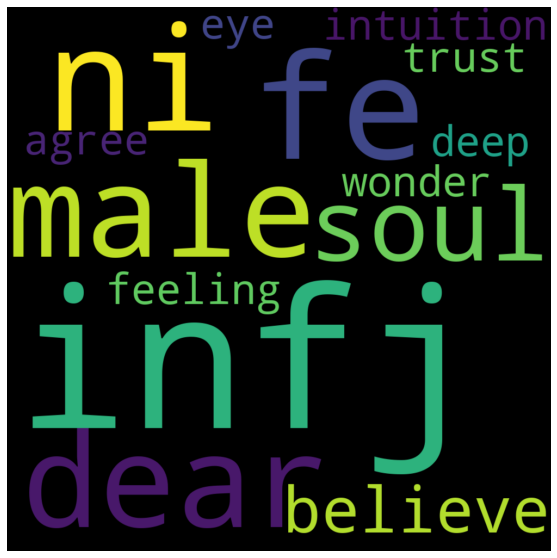

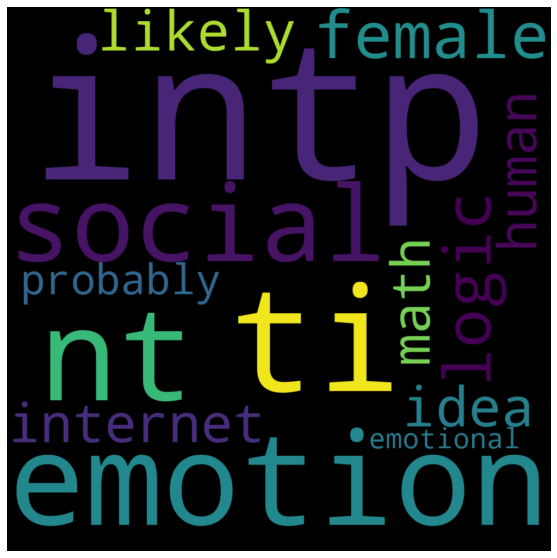

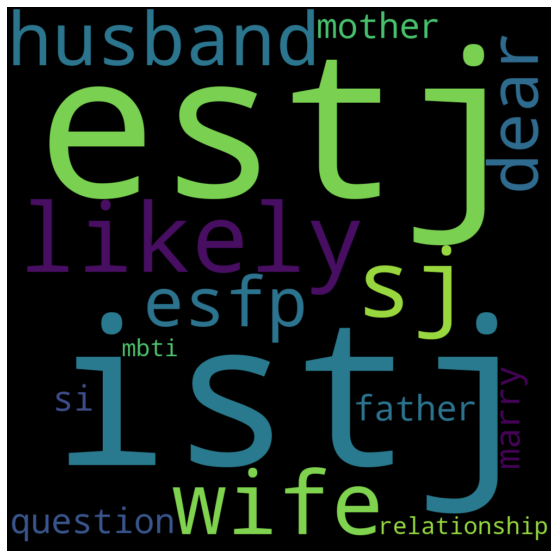

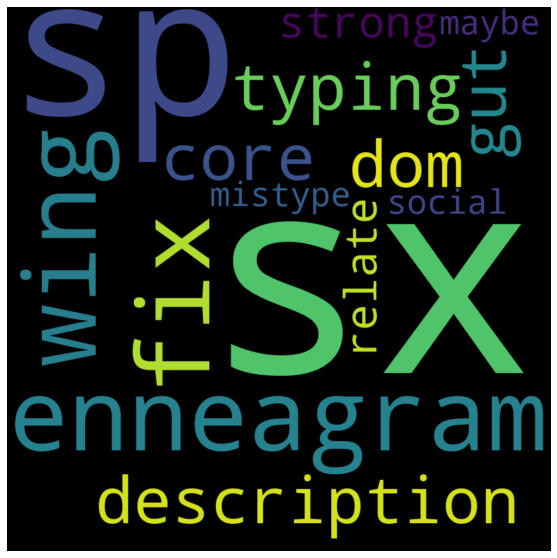

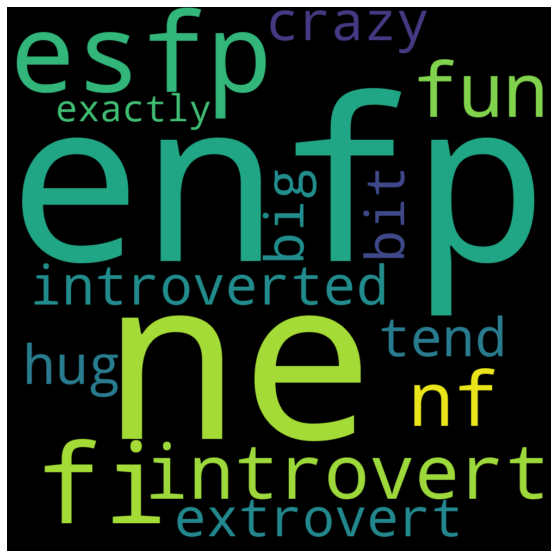

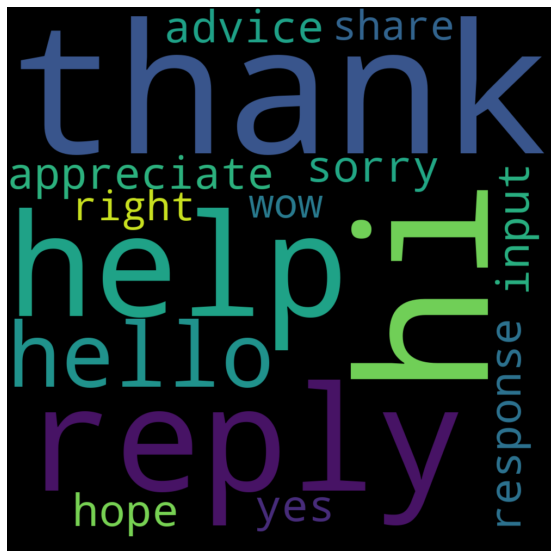

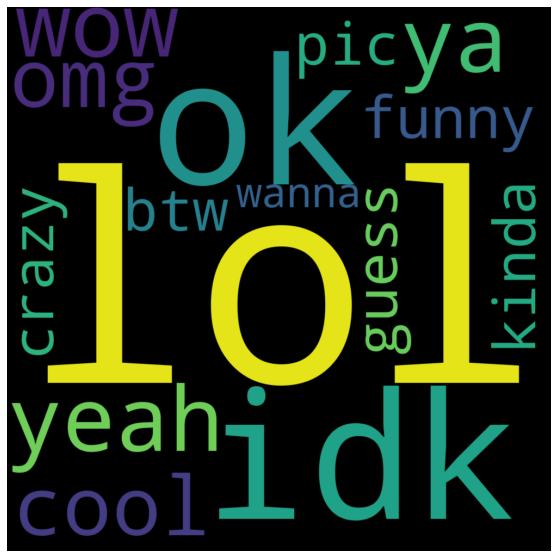

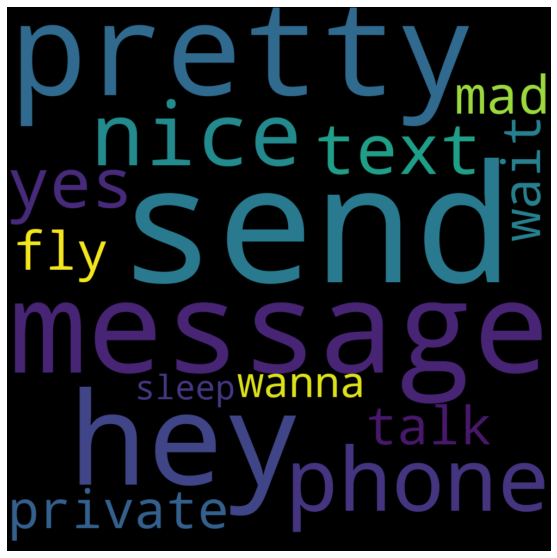

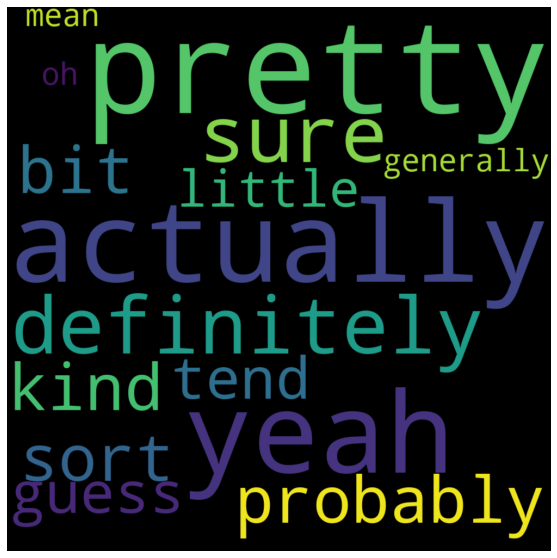

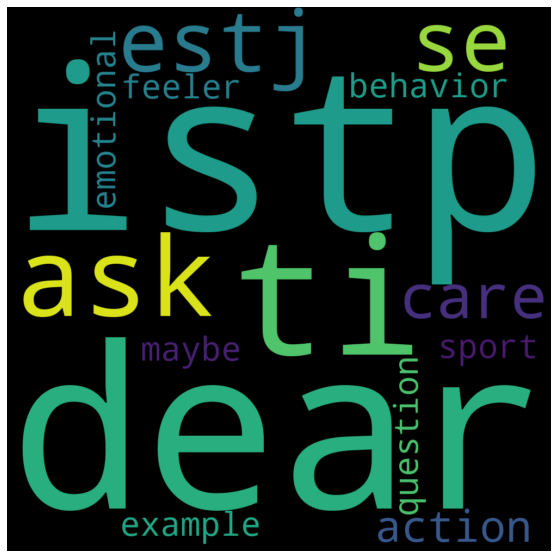

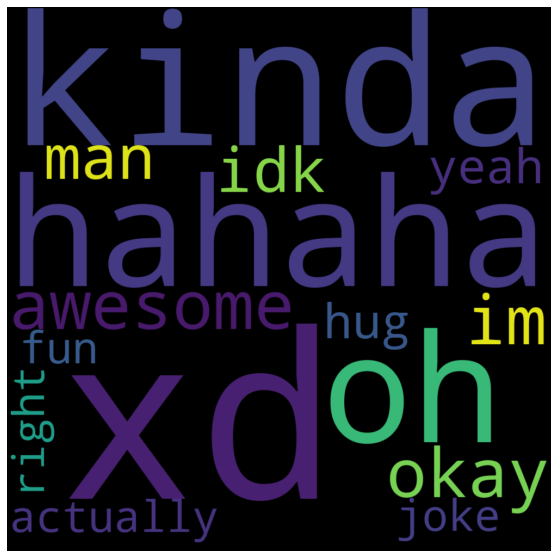

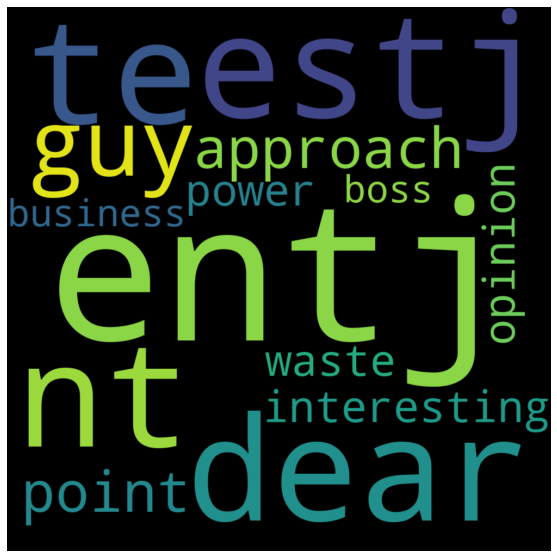

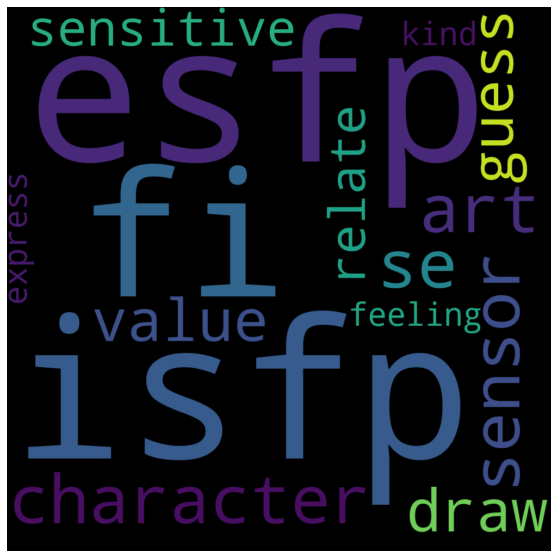

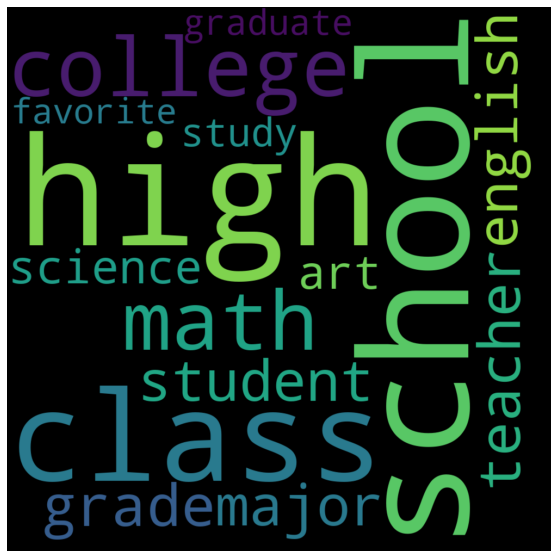

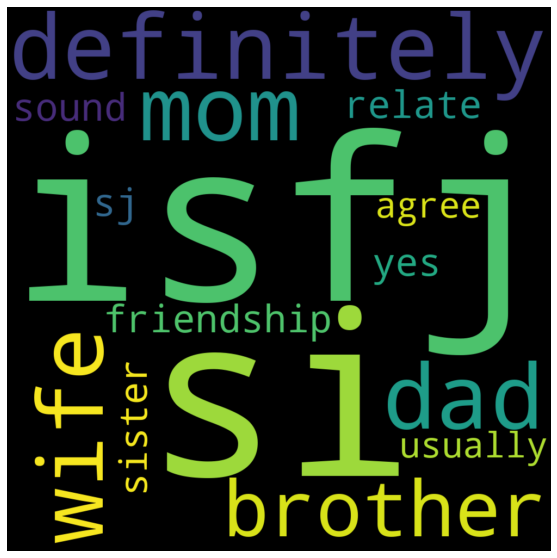

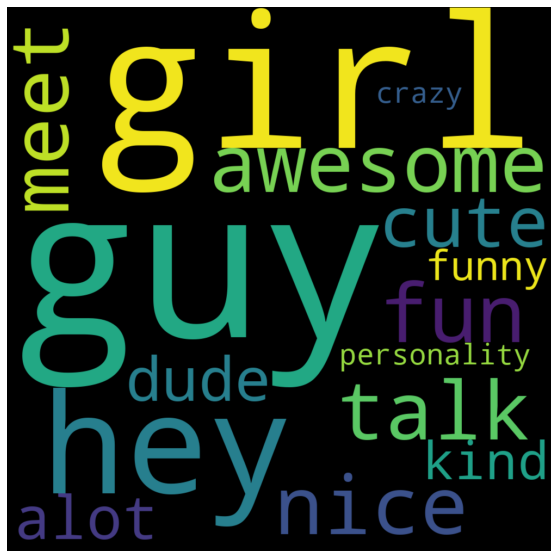

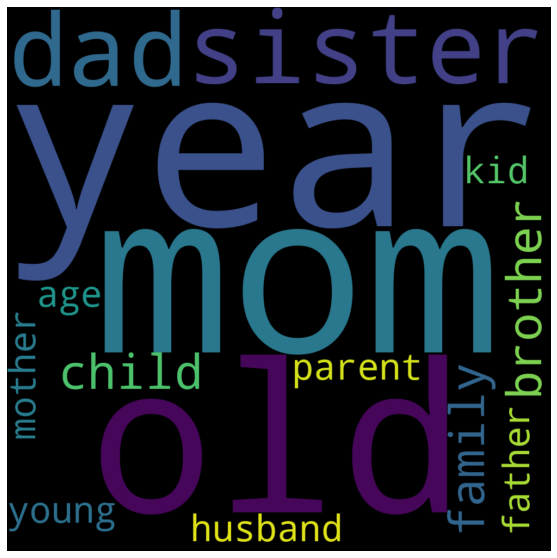

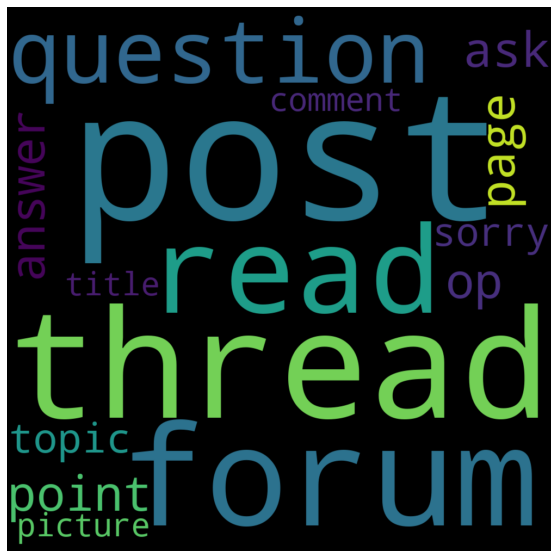

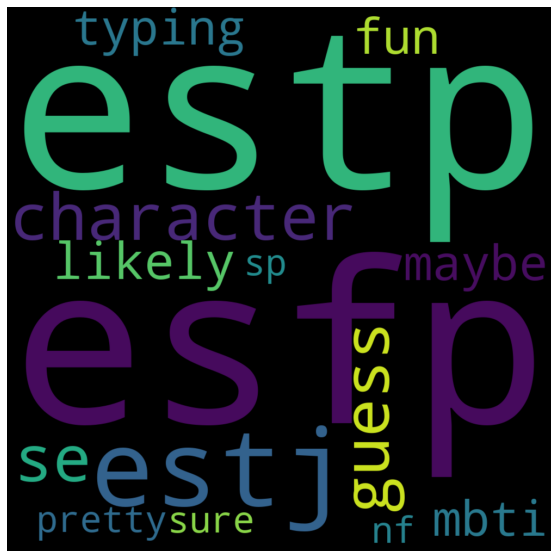

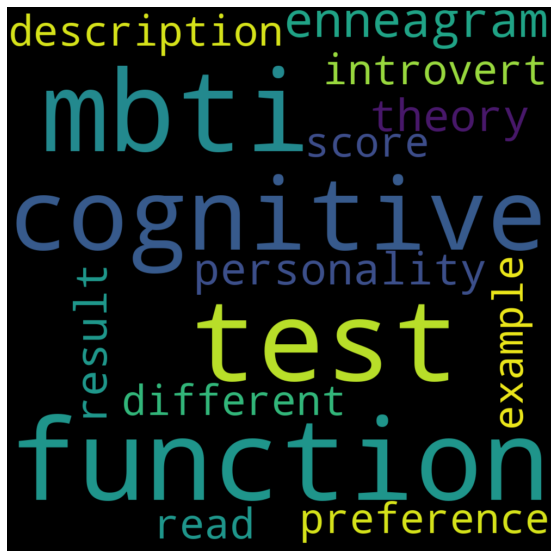

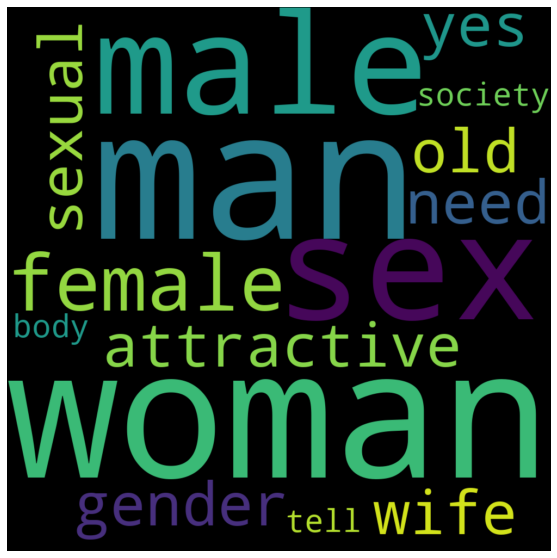

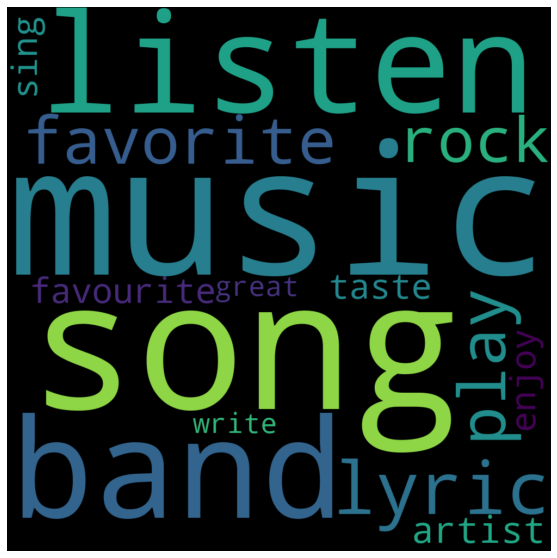

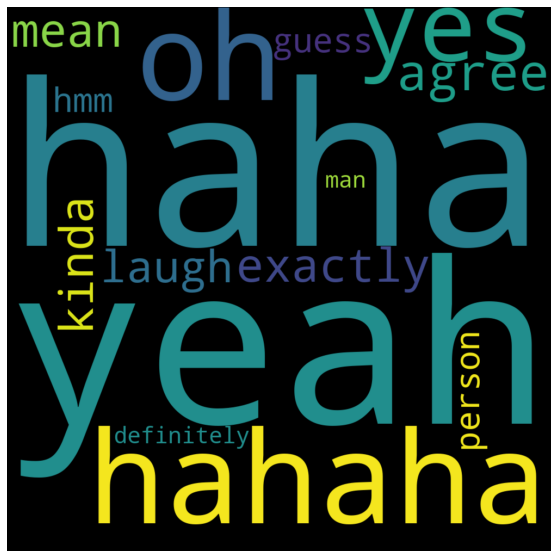

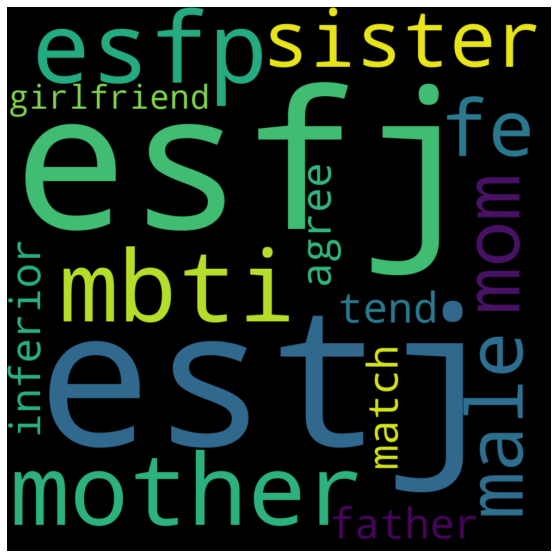

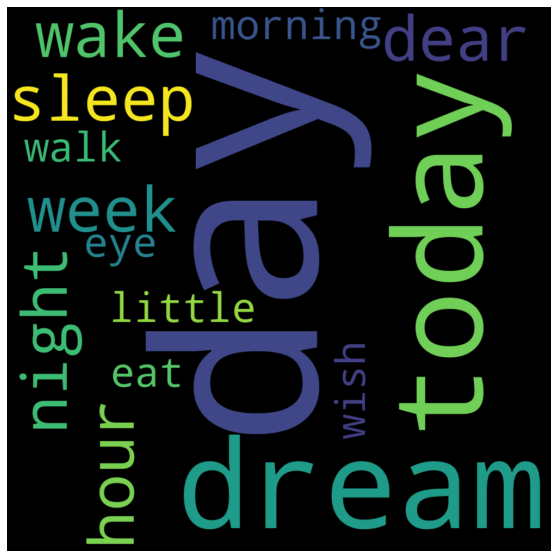

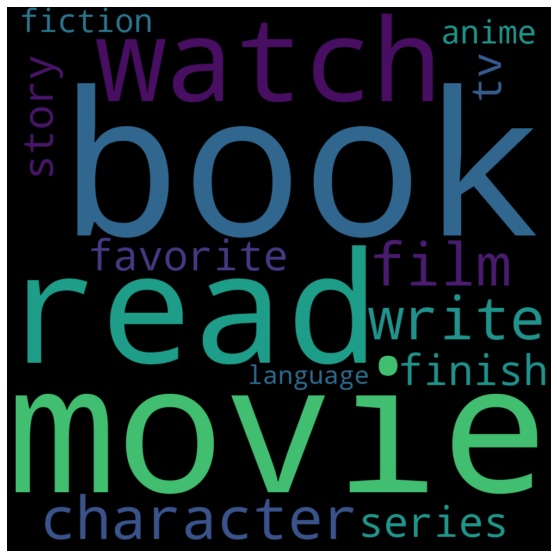

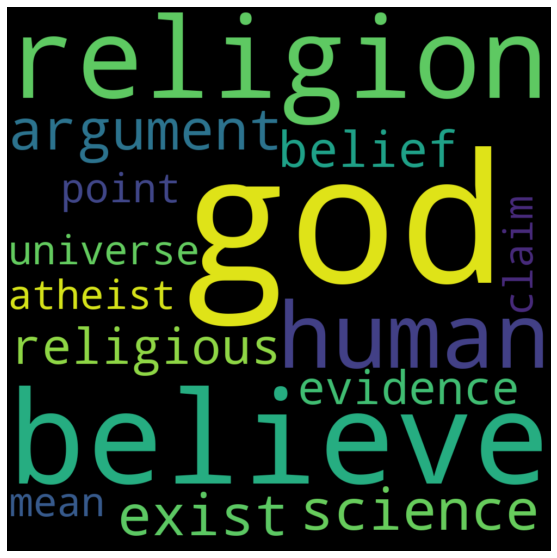

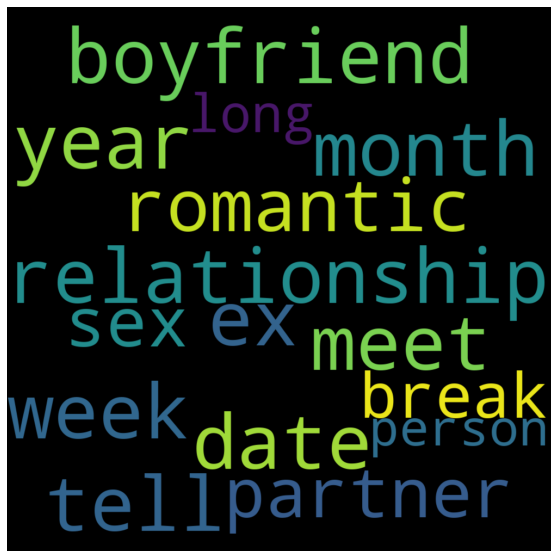

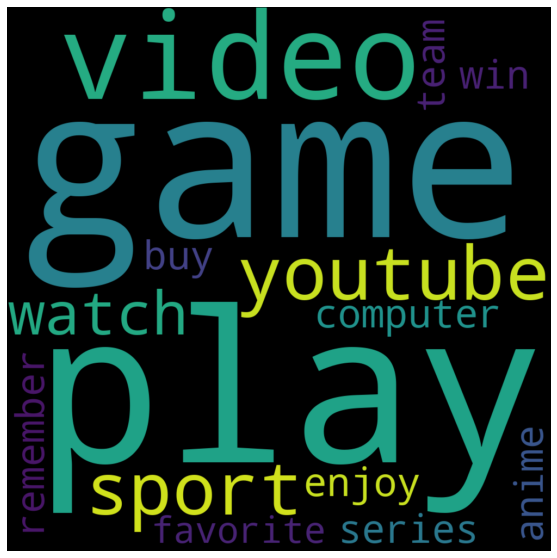

In [244]:
from wordcloud import WordCloud 
for text in topics:

    topic = f'topic {text.split()[0][:-1]}'

    # Generate a word cloud image
    wordcloud = WordCloud(width = 1000, height = 1000,
                    background_color ='black',
                    min_font_size = 20).generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(f'word_clouds/topics/{topic}.png',bbox_inches = 'tight', pad_inches = .25)
    plt.show()

#### POS word-cloud

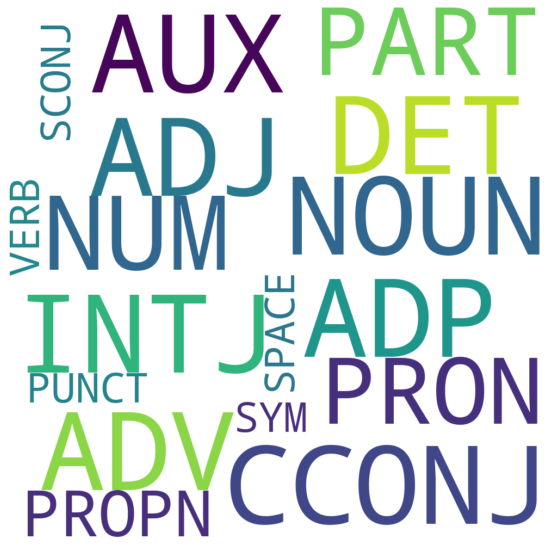

In [257]:
text = ' '.join(list(POS_df.columns))
topic = f'topic {text.split()[0][:-1]}'

# Generate a word cloud image
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                max_font_size = 200).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(f'word_clouds/topics/{topic}.png',bbox_inches = 'tight', pad_inches = .25)
plt.show()

### This was LDA 

In [133]:
# X_train_topics = pd.DataFrame(doc_topic.round(5),
#              index = X_train.index,
#              columns = topics)
# X_test_topics = pd.DataFrame(X_test_topic_array.round(5),
#              index = X_test.index,
#              columns = topics)
# X_train_topics

album, way, vulnerability, china, sane, unconsciously, pushy, moron, linger, cherry, tis, cliff, ipad, wat, nexus  \
1632                                            0.00315                                                                   
1454                                            0.00289                                                                   
5949                                            0.00289                                                                   
1077                                            0.00314                                                                   
5096                                            0.00327                                                                   
...                                                 ...                                                                   
5668                                            0.00590                                                                   
324                                             0.00315                                                                   
3157                                            0.00308                                                                   
5994                                            0.00291                                                                   
5243                                            0.00329                                                                   

      vulnerability, china, sane, unconsciously, pushy, moron, linger, cherry, tis, cliff, ipad, wat, nexus, twitch, mexican  \
1632                                            0.00315                                                                        
1454                                            0.00289                                                                        
5949                                            0.00289                                                                        
1077                                            0.00314                                                                        
5096                                            0.00327                                                                        
...                                                 ...                                                                        
5668                                            0.00590                                                                        
324                                             0.00315                                                                        
3157                                            0.00308                                                                        
5994                                            0.00291                                                                        
5243                                            0.00329                                                                        

      vulnerability, china, sane, unconsciously, pushy, moron, linger, cherry, tis, cliff, ipad, wat, nexus, twitch, mexican  \
1632                                            0.00315                                                                        
1454                                            0.00289                                                                        
5949                                            0.00289                                                                        
1077                                            0.00314                                                                        
5096                                            0.00327                                                                        
...                                                 ...                                                                        
5668                                            0.00590                                         

In [143]:
import pyLDAvis
pyLDAvis(X_train_topics)

/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: 'module' object is not callable

### Spacy-made-easy template

In [154]:
df['POS'] = df.clean_post.apply(lambda x:[token.pos_ for token in nlp(x)])  

<ipython-input-154-2eca3b27efbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POS'] = df.clean_post.apply(lambda x:[token.pos_ for token in nlp(x)])


In [97]:
len(df.POS[0])
# nouns, adj, adv, verbs
len(nlp(df.clean_post[0]))

242

In [67]:
import spacy 
nlp = spacy.load('en_core_web_sm')

# Create an nlp object
doc = nlp(example)
 
# Iterate over the tokens
    # Print the token and its part-of-speech tag
x=[token.pos_ for token in doc]

In [69]:
cv = CountVectorizer()

cve = cv.fit_transform([x)

pd.DataFrame(cve.toarray(), columns=cv.get_feature_names())

adj  adp  adv  aux  cconj  det  noun  num  part  pron  propn  punct  \
0      0    0    0    0      0    0     0    0     0     0      1      0   
1      0    0    0    0      0    0     0    0     0     0      0      0   
2      0    0    0    0      0    1     0    0     0     0      0      0   
3      0    0    0    0      0    0     1    0     0     0      0      0   
4      0    0    0    0      0    0     0    0     0     0      0      1   
..   ...  ...  ...  ...    ...  ...   ...  ...   ...   ...    ...    ...   
203    0    0    0    0      0    0     1    0     0     0      0      0   
204    0    0    0    0      0    0     0    0     0     0      0      1   
205    0    0    0    0      0    0     0    0     0     0      0      0   
206    0    1    0    0      0    0     0    0     0     0      0      0   
207    0    0    0    0      0    0     0    0     0     0      1      0   

     sconj  space  verb  
0        0      0     0  
1        0      0     1  
2        0      0     0  
3        0      0     0  
4        0      0     0  
..     ...    ...   ...  
203      0      0     0  
204      0      0     0  
205      0      0     1  
206      0      0     0  
207      0      0     0  

[208 rows x 15 columns]

In [65]:
example = 'Hamilton brought a boost. The Lion King provided ballast. And Broadway, once again, broke a record: The theater season that just ended attracted more people, and more money, than any before. Broadway seems to be defying the cultural odds: An ancient art form in the digital age, it is strengthening thanks to an everincreasing influx of tourists and a resurgent enthusiasm for musical theater. The season that ended on Sunday included 13,317,980 visitors to Broadway shows  a record number, up 1.6 percent over the previous season, according to figures released on Monday by the Broadway League. Theaters grossed 1.373 billion, also a record, up 0.6 percent over the previous season, although the grosses are not adjusted for inflation. Once again, Simba ruled supreme: The Lion King, still mighty more than 18 years after it opened, grossed 102.7 million on Broadway last season, far outpacing any other show. The musical, which has multiple productions running simultaneously around the globe, has grossed more than 6.2 billion worldwide, and has been seen by 85 million people over its history, according to Disney'

In [108]:
nlp.pipe_names

['tagger', 'parser', 'ner']

In [44]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

import string
punctuations = string.punctuation

from spacy.lang.en import English
parser = English()

#Custom transformer using spaCy 
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Basic utility function to clean the text 
def clean_text(text):     
    return text.strip().lower()

/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [45]:
#Create spacy tokenizer that parses a sentence and generates tokens
#these can also be replaced by word vectors 
def spacy_tokenizer(sentence):
    tokens = parser(sentence)
    tokens = [tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in tokens]
    tokens = [tok for tok in tokens if (tok not in stopwords and tok not in punctuations)]     
    return tokens
    

#create vectorizer object to generate feature vectors, we will use custom spacy’s tokenizer
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
classifier = LinearSVC()

In [72]:
# Create the  pipeline to clean, tokenize, vectorize, and classify 
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

# Load sample data
train = list(zip(X_train,y_train))
test =  list(zip(X_test,y_test))

# Create model and measure accuracy
pipe.fit([x[0] for x in train], [x[1] for x in train]) 
pred_data = pipe.predict([x[0] for x in test]) 

print("Accuracy:", accuracy_score([x[1] for x in test], pred_data))

Accuracy: 0.8945244956772335


In [63]:
pipe.predict([x[0] for x in test])

array([0, 0, 1, ..., 0, 0, 1])